# StaTDS Tutorial: Clustering

Clustering is a type of unsupervised learning that involves grouping similar data points together. The goal is to have data points in the same group (or cluster) be more similar to each other than to those in other groups. This tutorial will demonstrate clustering using differents datasets.

## Dependency Installation




Before we start, it's crucial to set up our development environment by installing the necessary dependencies. If you're using Google Colab, you only need to install StaTDS.

In [1]:
pip install statds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 32.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.0 which is incompatible.


## Evaluating Classification Algorithms: A Structured Approach


The evaluation process of classification algorithms can be structured into the following steps to ensure a rigorous and meaningful comparison. This task has become essential due to the wide variety of available algorithms and the impact of their parameters on performance.

1. Selection of Datasets and Algorithms: We begin by jointly selecting datasets and algorithms. This choice is critical as it defines the context and expectations of our comparative study.

2. Training and Evaluation of Algorithms: Each algorithm is trained on the selected datasets. This step is crucial in understanding how each algorithm performs with different data. Here, we also determine which metrics to study, knowing whether these are intended to be maximized or minimized.

3. Collection and Analysis of Metrics: The results from each algorithm-dataset combination are collected. We then conduct a preliminary analysis to identify trends and notable behaviors. This analysis helps us formulate hypotheses about the performance and characteristics of the algorithms.

4. Statistical Analysis: We proceed with conducting statistical tests on the gathered results. This step is vital to determine the presence of significant statistical differences between the algorithms and to ensure that our conclusions are solidly grounded.

5. Conclusion and Presentation of Results: Finally, we conclude our study with the presentation of our findings. Here, we synthesize our research, highlight key differences, and provide data-based recommendations.

![StepsEvaluate](https://media.discordapp.net/attachments/1179836822440902738/1179836868834119710/StepsEvaluate.png?ex=657b3bb5&is=6568c6b5&hm=6e753d5fe91a04bb6d407b99acc6f9a5302f9c36c455f6d8a7a8183fd1368dfc&=&format=webp&quality=lossless)


Each of these steps will be illustrated and detailed below, using a case example. This approach will facilitate tracking and replication in similar situations. Through this structured flow, we aim to provide a clear and reproducible methodology for comparing classification algorithms.

### Select Datasets and Algorithms

To ensure a practical and relevant analysis, we will select classification datasets from the UCI Machine Learning Repository, covering diverse domains such as biology, automotive industry, and air quality, among others. This practical approach will aid in illustrating how the characteristics of data can influence the selection and configuration of the appropriate classification algorithm.

In [2]:
datasets_list = {
    "Iris": {"URL":"https://archive.ics.uci.edu/static/public/53/iris.zip", "index_target":-1},
    "Penguins": {"URL":"https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv", "index_target":1, "remove_column":[0]},
    "Hepatitis": {"URL":"https://archive.ics.uci.edu/static/public/46/hepatitis.zip", "index_target":0},
    "Darwin": {"URL":"http://archive.ics.uci.edu/static/public/732/darwin.zip", "index_target":-1, "remove_column":[0]},
    "Breast Cancer Wisconsin": {"URL":"https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip", "index_target":0, "remove_column":[0]},
    "Glass Identification": {"URL":"https://archive.ics.uci.edu/static/public/42/glass+identification.zip", "index_target":-1, "remove_column":[0]},
    "Cirrhosis Patient Survival": {"URL":"http://archive.ics.uci.edu/static/public/878/cirrhosis+patient+survival+prediction+dataset-1.zip", "index_target":0, "remove_column":[0,1]},
    "Car Evaluation": {"URL":"https://archive.ics.uci.edu/static/public/19/car+evaluation.zip", "index_target":-1},
    "Wine": {"URL":"https://archive.ics.uci.edu/static/public/109/wine.zip", "index_target":0},
    "Auction Verification": {"URL":"http://archive.ics.uci.edu/static/public/713/auction+verification.zip", "index_target":-1, "remove_column":[-1]}
    }

In [3]:
import requests
import zipfile
import os
import pandas as pd
import shutil
from io import BytesIO

def download_and_process_datasets(datasets_dictionary):
    dataframes = []

    for name, values in datasets_dictionary.items():
        # Download the file
        response = requests.get(values["URL"])

        # Verify if the download was successful
        if response.status_code != 200:
            print(f"Error downloading {name} from {values['URL']}")
            continue

        # Try to open the file as a zip file
        try:
            if 'text/csv' in response.headers.get('Content-Type', '') or values["URL"].endswith('.csv'):
                df = pd.read_csv(BytesIO(response.content))
                if "remove_column" in values:
                    df = df.drop(df.columns[values["remove_column"]], axis=1)
                print(name, df.shape[0])
                target = df.columns[values["index_target"]]
                df = df.rename(columns={target: "target"})
                dataframes.append(df)
            else:
                with zipfile.ZipFile(BytesIO(response.content)) as zfile:
                    # Extract all the files
                    zfile.extractall("temp")

                    # Search for the .data file and read it into a dataframe
                    for file in zfile.namelist():
                        full_file_path = os.path.join("temp", file)
                        if (file.endswith(".data") or file.endswith(".csv")) and os.path.isfile(full_file_path):
                            separator = ',' if ',' in open(full_file_path).readline() else ';' if ';' in open(full_file_path).readline() else " "
                            if separator == " ":
                                with open(full_file_path, 'r') as file:
                                    content = file.read()
                                # Replace all double spaces with single spaces
                                modified_content = content.replace('   ', '  ')
                                modified_content = modified_content.replace('  ', ' ')
                                # Open the file again in write mode and save the changes
                                with open(full_file_path, 'w') as file:
                                    file.write(modified_content)
                            header = 0 if name in ["Auction Verification", "Darwin", "Cirrhosis Patient Survival"] else None
                            df = pd.read_csv(full_file_path, sep=separator, header=header)
                            if "remove_column" in values:
                                df = df.drop(df.columns[values["remove_column"]], axis=1)
                            print(name, df.shape[0])
                            target = df.columns[values["index_target"]]
                            df = df.rename(columns={target: "target"})
                            dataframes.append(df)
                            break

        except zipfile.BadZipFile:
            print(f"The downloaded file from {values['URL']} is not a valid zip file.")

        # Clean up temporary files
        for file in os.listdir("temp"):
            path = os.path.join("temp", file)
            if os.path.isfile(path):
                os.remove(path)
            elif os.path.isdir(path):
                shutil.rmtree(path)

    # Return the list of dataframes
    return dataframes


In [4]:
dataframes = download_and_process_datasets(datasets_list)

Iris 150
Penguins 344
Hepatitis 155
Darwin 174
Breast Cancer Wisconsin 569
Glass Identification 214
Cirrhosis Patient Survival 418
Car Evaluation 1728
Wine 178
Auction Verification 2043


### Train and Evaluate

In this training phase, we have chosen to compare K-Means, Agglomerative Clustering, and DBSCAN. As a primary metric for our subsequent statistical analysis, we will focus on the Silhouette Score, which measures the degree of separation between clusters. The Silhouette Score ranges from -1 to 1, where a high score indicates well-separated clusters. Therefore, in our analysis, we aim to maximize the Silhouette Score to achieve distinct clustering. Additionally, we will consider the Davies-Bouldin Score, which evaluates the clustering quality by measuring the average 'similarity' between clusters, with lower scores indicating better clustering. The ideal Davies-Bouldin Score is close to zero, and our goal is to minimize this score to ensure minimal overlap between clusters.

In [31]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn import datasets
import numpy as np

algorithms = ["K-Means", "Agglomerative", "Spectral"]

results_scores = {"Silhouette Score": {alg: [] for alg in algorithms}, "Davies-Bouldin Score": {alg: [] for alg in algorithms}}

name_data = list(datasets_list.keys())
for index_df, name in zip(range(len(dataframes)), name_data):

  df = dataframes[index_df].copy()
  # Data preprocessing
  # Process null values
  df = df.replace('?', np.nan)
  df = df.dropna()

  y = df["target"].to_numpy()
  try:
    y = y.astype(float)
  except Exception as e:
    y, _ = pd.factorize(y)

  columns = list(df.columns)
  columns.remove("target")
  df.drop("target", axis=1, inplace=True)

  cols_str = df[columns].select_dtypes(include=['object']).columns
  # Preprocessing categorical features
  for i in cols_str:
    df[i], unicos = pd.factorize(df[i])

  X = df.to_numpy()
  n_cluster = len(np.unique(y))
  kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init="auto")
  agglo = AgglomerativeClustering(n_clusters=n_cluster)
  spectral_clustering = SpectralClustering(n_clusters=n_cluster, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)

  # Entrenar los algoritmos
  kmeans_labels = kmeans.fit_predict(X)
  agglo_labels = agglo.fit_predict(X)
  spectral_clustering_labels = spectral_clustering.fit_predict(X)

  for name_alg, labels in [('K-Means', kmeans_labels), ('Agglomerative', agglo_labels), ('Spectral', spectral_clustering_labels)]:
      if len(set(labels)) > 1:  # Evitar dividir por cero en el caso de un solo cluster
          sil_score = silhouette_score(X, labels)
          davies_score = davies_bouldin_score(X, labels)

          print(name, name_alg, sil_score)
      else:
        print(name, name_alg, "Only one cluster")
        sil_score = -np.inf
        davies_score = np.inf
      results_scores['Silhouette Score'][name_alg].append(sil_score)
      results_scores['Davies-Bouldin Score'][name_alg].append(davies_score)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Iris K-Means 0.5511916046195927
Iris Agglomerative 0.5543236611296426
Iris Spectral 0.5541608580282856
Penguins K-Means 0.5589036319323755
Penguins Agglomerative 0.5163917739985129
Penguins Spectral 0.22363369167873082
Hepatitis K-Means 0.35227456448562716
Hepatitis Agglomerative 0.3092678226070527
Hepatitis Spectral 0.3335706596489313
Darwin K-Means 0.9392515508995728
Darwin Agglomerative 0.9392515508995728
Darwin Spectral 0.9175359268949401
Breast Cancer Wisconsin K-Means 0.6972646156059465
Breast Cancer Wisconsin Agglomerative 0.6899796318793474
Breast Cancer Wisconsin Spectral 0.4064674289315106
Glass Identification K-Means 0.4442811600335675
Glass Identification Agglomerative 0.4621918906200732
Glass Identification Spectral 0.09891288193336771
Cirrhosis Patient Survival K-Means 0.39420028034066457
Cirrhosis Patient Survival Agglomerative 0.46650838014422596
Cirrhosis Patient Survival Spectral 0.32850705212011355
Car Evaluation K-Means 0.15804393902090433
Car Evaluation Agglomerati

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Auction Verification K-Means 0.5223310768176835
Auction Verification Agglomerative 0.5191793395827695
Auction Verification Spectral -0.19081040249574463


In [33]:
result_sil_score = pd.DataFrame(results_scores["Silhouette Score"])
result_davies_score = pd.DataFrame(results_scores["Davies-Bouldin Score"])

result_sil_score["Dataset"] = name_data
result_sil_score = result_sil_score[[result_sil_score.columns[-1]] + list(result_sil_score.columns[:-1])]
result_davies_score["Dataset"] = name_data
result_davies_score = result_davies_score[[result_davies_score.columns[-1]] + list(result_davies_score.columns[:-1])]

In [34]:
result_sil_score

,Dataset,K-Means,Agglomerative,Spectral
0,Iris,0.551192,0.554324,0.554161
1,Penguins,0.558904,0.516392,0.223634
2,Hepatitis,0.352275,0.309268,0.333571
3,Darwin,0.939252,0.939252,0.917536
4,Breast Cancer Wisconsin,0.697265,0.689980,0.406467
5,Glass Identification,0.444281,0.462192,0.098913
6,Cirrhosis Patient Survival,0.394200,0.466508,0.328507
7,Car Evaluation,0.158044,0.158320,0.156894
8,Wine,0.571138,0.564480,0.556771
9,Auction Verification,0.522331,0.519179,-0.190810


In [35]:
result_davies_score

,Dataset,K-Means,Agglomerative,Spectral
0,Iris,0.666039,0.656256,0.658444
1,Penguins,0.538823,0.548723,2.912439
2,Hepatitis,1.114205,1.129572,1.113679
3,Darwin,0.071528,0.071528,0.243415
4,Breast Cancer Wisconsin,0.504404,0.479464,0.741885
5,Glass Identification,0.876905,0.981729,1.330378
6,Cirrhosis Patient Survival,0.907786,0.830511,0.752387
7,Car Evaluation,1.730419,1.903869,1.903869
8,Wine,0.534243,0.535734,0.529347
9,Auction Verification,0.672427,0.673473,2.275549


### Statistical Analysis

In this scenario, the choice of statistical tests for multiple or pairwise comparisons depends on our specific objectives. However, before proceeding to these comparisons, it's crucial to assess the normality and homoscedasticity (equal variances) of our data.


![Steps Test Statistical](https://media.discordapp.net/attachments/1179836822440902738/1180048286271418418/flowchart-Test_1.png?ex=657c009b&is=65698b9b&hm=2a7003943fa9cd6ae996484f94ad55850850b141d9e21b80585481f4b0ad2090&=&format=webp&quality=lossless)


To evaluate these aspects, we will employ two key statistical tests: the D'Agostino-Pearson test and the Levene's test. The D'Agostino-Pearson test will help us determine whether our data distribution deviates from normality, while Levene's test will assess the homogeneity of variances across different groups. These tests are essential prerequisites that will ensure the validity and reliability of our subsequent statistical analyses and comparisons, providing a solid foundation for our findings.

In [46]:
dataset = result_sil_score # Es una métrica a maximizar
criterion = True # Si es maximizar


In [47]:
from statds.normality import d_agostino_pearson
from statds.homoscedasticity import levene_test

results_to_test = dataset.copy()
alpha = 0.05
columns = list(results_to_test.columns)
results = []

for i in range(1, len(columns)):
    results.append(d_agostino_pearson(results_to_test[columns[i]].to_numpy(), alpha))

statistic_list, p_value_list, cv_value_list, hypothesis_list = zip(*results)

results_test = pd.DataFrame({"Algorithm": columns[1:], "Statistic": statistic_list, "p-value": p_value_list, "Results": hypothesis_list})
print(results_test)


statistic, p_value, rejected_value, hypothesis = levene_test(results_to_test, alpha, center='mean')
print(f"Statistic {statistic}, Rejected Value {rejected_value}, Hypothesis: {hypothesis}")

       Algorithm  Statistic   p-value  \
0        K-Means   1.628881  0.442887   
1  Agglomerative   1.835084  0.399500   
2       Spectral   0.852884  0.652828   

                                             Results  
0  Same distributions (fail to reject H0) with al...  
1  Same distributions (fail to reject H0) with al...  
2  Same distributions (fail to reject H0) with al...  
Statistic 0.7081848614982986, Rejected Value 4.7374, Hypothesis: Same distributions (fail to reject H0) with alpha 0.05


Upon examination, it is evident that none of the samples obtained from the algorithms exhibit a normal distribution, nor do they collectively demonstrate homogeneous variance. Consequently, the conditions for employing parametric tests are not met.

In light of this, non-parametric tests will be utilized. Specifically, we will begin with a Friedman test. If the Friedman test indicates significant differences, we will then consider the application of Post-hoc tests to further investigate these differences. This approach ensures the use of appropriate statistical methods that align with the nature of our data, allowing for more accurate and reliable analysis.

In [49]:
from statds.no_parametrics import friedman

rankings, statistic, p_value, critical_value, hypothesis = friedman(dataset, alpha, criterion=criterion, verbose=True)
print(hypothesis)
print(f"Statistic {statistic}, Rejected Value {rejected_value}, p-value {p_value}")
print(rankings)

                            K-Means  Agglomerative  Spectral
Dataset                                                     
Iris                           3.00           1.00       2.0
Penguins                       1.00           2.00       3.0
Hepatitis                      1.00           3.00       2.0
Darwin                         1.50           1.50       3.0
Breast Cancer Wisconsin        1.00           2.00       3.0
Glass Identification           2.00           1.00       3.0
Cirrhosis Patient Survival     2.00           1.00       3.0
Car Evaluation                 2.00           1.00       3.0
Wine                           1.00           2.00       3.0
Auction Verification           1.00           2.00       3.0
R_mean                         1.55           1.65       2.8
Different distributions (reject H0) with alpha 0.05
Statistic 9.650000000000006, Rejected Value 4.7374, p-value 0.008026553870395131
{'K-Means': 1.55, 'Agglomerative': 1.65, 'Spectral': 2.8}


"In this instance, we have obtained a p-value of 0.0199759481255537, which is greater than the threshold of 0.05. Consequently, the null hypothesis is rejecteed, indicating that there are significant differences between the algorithms. If we wish to further validate this finding, we can apply a Nemenyi test for an all-against-all comparison. Following this, we can implement a Bonferroni-Dunn test, selecting best algorithm as our control algorithm. This two-step approach will provide a comprehensive and nuanced understanding of how each algorithm compares against the others and against a standard benchmark.

[1.55, 1.65, 2.8]
1.0481347166469228


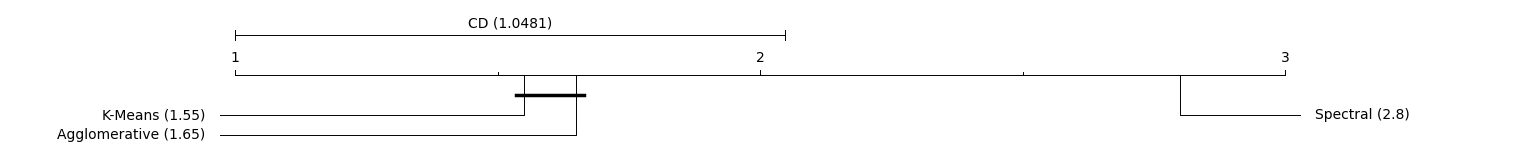

In [50]:
from statds.no_parametrics import nemenyi
num_cases = dataset.shape[0]
ranks_values, critical_distance_nemenyi, figure = nemenyi(rankings, num_cases, alpha)
print(ranks_values)
print(critical_distance_nemenyi)
figure.show()

                 Comparison  Statistic (Z)   p-value  Adjusted alpha  \
0  K-Means vs Agglomerative       0.223607  0.823063           0.050   
1         K-Means vs DBSCAN       3.465905  0.000528           0.025   

   Adjusted p-value  alpha         Results  
0          0.823063   0.05  H0 is accepted  
1          0.001057   0.05  H0 is rejected  


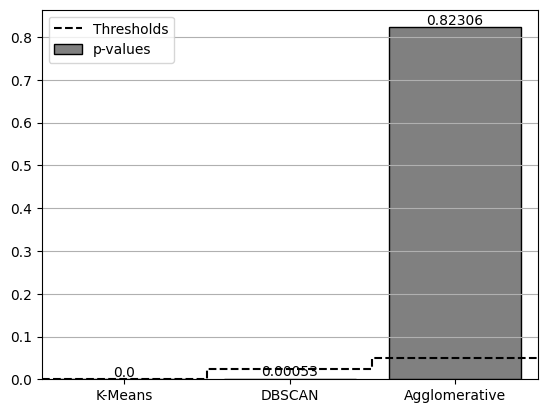

In [27]:
from statds.no_parametrics import holm
num_cases = dataset.shape[0]
results, figure = holm(rankings, num_cases, alpha, control = "K-Means", type_rank = "Friedman")
print(results)
figure.show()

It is noticeable that the algorithm most distinct from Random Forest is the Ridge Regression. To scrutinize these differences further, we can analyze the results using a Binomial test. This analysis can confirm, with an alpha level of 0.05, that there are indeed significant differences between these two algorithms. Employing the Binomial test, known for its efficacy in non-parametric pairwise comparisons, provides a robust method to statistically validate the observed disparities between Random Forest and Ridge Regression.

In [30]:
from statds.no_parametrics import binomial

selected_columns = ["K-Means", "Agglomerative"]
statistic, rejected_value, p_value, hypothesis = binomial(dataset[selected_columns], alpha)
print(hypothesis)
print(f"Statistic {statistic}, Rejected Value {rejected_value}, p-value {p_value}")

Same distributions (fail to reject H0) with alpha 0.05
Statistic 5, Rejected Value None, p-value 0.24609375


### Conclusion

After conducting this comprehensive study, we can conclude that, at a significance level of 0.05 (alpha), these algorithms do exhibit significant differences overall. This nuanced insight highlights the importance of context and specific comparative analyses in understanding the relative strengths and weaknesses of different machine learning algorithms.